In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from datetime import datetime
import numpy as np
import numpy as np
from scipy.stats import gaussian_kde

import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Load your GDP data
path = "pib_per_capita_countries_dataset.csv"
df_data = pd.read_csv(path)

In [2]:
df_data

,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,gdp_per_capita,gdp_variation
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1960,0.000000,0.000000
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1961,0.000000,0.000000
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1962,0.000000,0.000000
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1963,0.000000,0.000000
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1964,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
13755,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),2019,1684.027904,-7.785580
13756,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),2020,1730.413489,-9.333971
13757,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),2021,1724.387731,6.611911
13758,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),2022,2040.552459,4.343667


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         13760 non-null  object 
 1   country_name         13760 non-null  object 
 2   region               8320 non-null   object 
 3   sub_region           13760 non-null  object 
 4   intermediate_region  5760 non-null   object 
 5   indicator_code       13760 non-null  object 
 6   indicator_name       13760 non-null  object 
 7   year                 13760 non-null  int64  
 8   gdp_per_capita       13760 non-null  float64
 9   gdp_variation        13545 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [5]:
df_data.describe()

,year,gdp_per_capita,gdp_variation
count,13760.000000,13760.000000,1.354500e+04
mean,1991.500000,7654.829033,7.256966e+03
std,18.473624,17076.866349,8.444125e+05
min,1960.000000,0.000000,-6.442358e+01
25%,1975.750000,225.615482,0.000000e+00
50%,1991.500000,1210.690043,9.432133e-01
75%,2007.250000,6331.442354,3.816873e+00
max,2023.000000,256580.515123,9.827525e+07


In [6]:
df_data.isna().sum()

country_code              0
country_name              0
region                 5440
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
gdp_per_capita            0
gdp_variation           215
dtype: int64

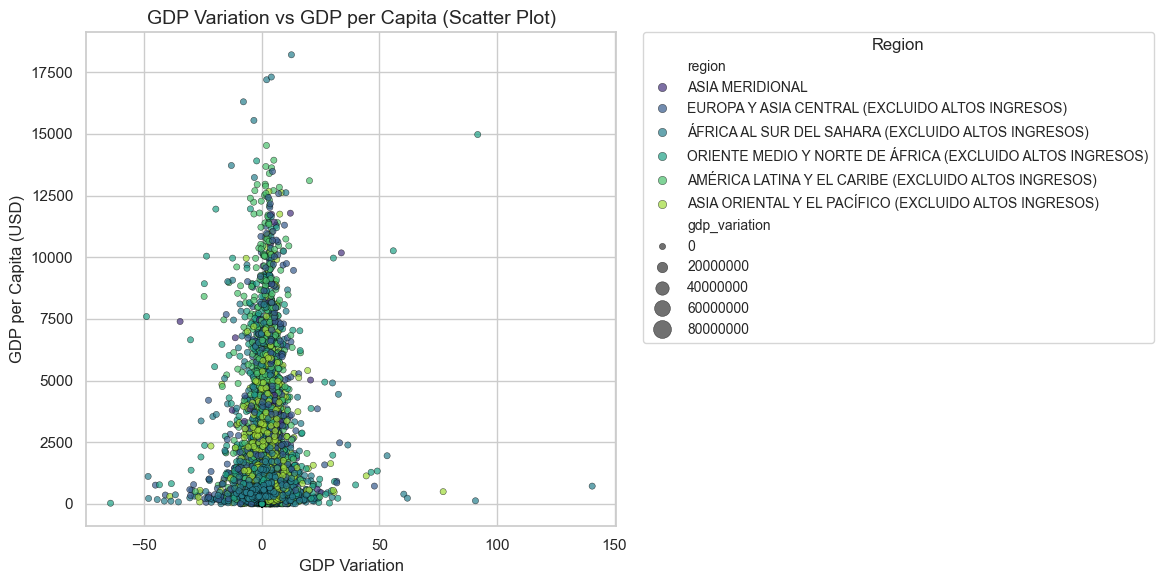

In [7]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create scatter plot
scatter = sns.scatterplot(
    data=df_data,
    x="gdp_variation",
    y="gdp_per_capita",
    hue="region",
    size="gdp_variation",
    sizes=(20, 200),
    palette="viridis",
    alpha=0.7,
    edgecolor="black"
)

# Titles and labels
plt.title("GDP Variation vs GDP per Capita (Scatter Plot)", fontsize=14)
plt.xlabel("GDP Variation", fontsize=12)
plt.ylabel("GDP per Capita (USD)", fontsize=12)

# Move the legend outside the plot
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    title="Region",
    fontsize='small',
    title_fontsize='medium'
)

plt.tight_layout()
plt.show()

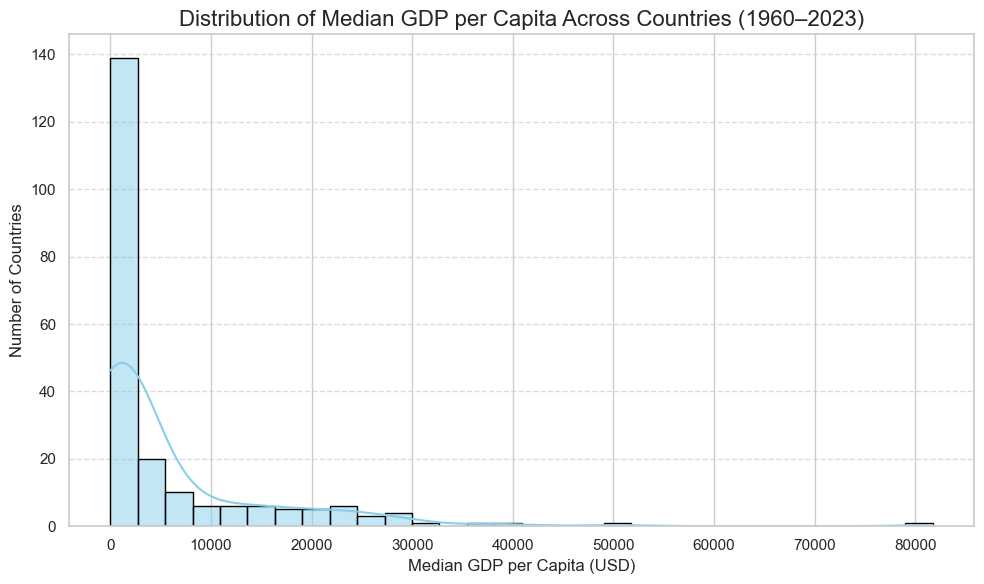

In [8]:

# Step 1: Group by country and calculate median GDP per capita
median_gdp = df_data.groupby("country_name")["gdp_per_capita"].median().reset_index()

# Step 2: Plot the histogram using median GDP
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(median_gdp["gdp_per_capita"], bins=30, kde=True, color="skyblue", edgecolor="black")

# Step 3: Title and axis labels
plt.title("Distribution of Median GDP per Capita Across Countries (1960–2023)", fontsize=16)
plt.xlabel("Median GDP per Capita (USD)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)

# Optional: add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
df_data['gdp_variation'] =df_data['gdp_variation'].fillna(0)

#check if null values are handled or not
df_data.isna().sum()

#check unique years
df_data["year"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

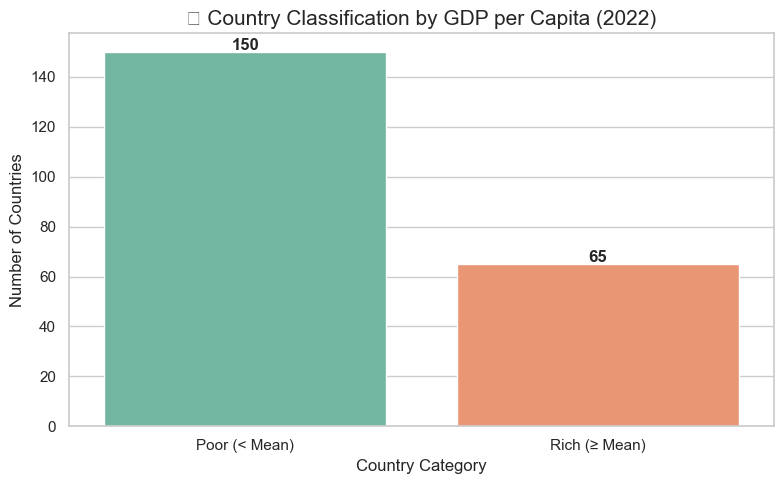

In [10]:
#1.richest countries vs poorest countries classification According to new 2022 data
# Filter for 2022 data and drop missing GDP per capita values
df_2023 = df_data[df_data['year'] == 2023].dropna(subset=['gdp_per_capita'])

# Calculate the mean GDP per capita for 2022
mean_gdp_2023 = df_2023['gdp_per_capita'].mean()

# Classify countries as Rich or Poor based on the mean
df_2023['category'] = df_2023['gdp_per_capita'].apply(
    lambda x: 'Rich (≥ Mean)' if x >= mean_gdp_2023 else 'Poor (< Mean)'
)

# Count of countries in each category
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(data=df_2023, x='category', palette='Set2')

# Add labels and formatting
plt.title('🌍 Country Classification by GDP per Capita (2022)', fontsize=15)
plt.xlabel('Country Category', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

# Annotate counts on bars
for index, value in enumerate(df_2023['category'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [72]:
# 2. predict for year 2024 gdp

In [11]:
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Ridge Performance:
R²: 0.9520
RMSE: 5951.2238

Lasso Performance:
R²: 0.9520
RMSE: 5954.1251

XGBoost Performance:
R²: 0.9123
RMSE: 8043.6043

year                  2021          2022          2023  2024_pred_Ridge  \
country_name                                                              
AFGANISTAN      356.496214    357.261153    415.707417       568.182034   
ALBANIA        6413.283286   6846.426143   8575.171134      9219.219031   
ALEMANIA      52265.654162  49686.115458  54343.226508     57866.284145   
ANDORRA       42425.699676  42414.059009  46812.448449     49558.205068   
ANGOLA         1925.874661   2929.694455   2308.159767      2308.129578   

year          2024_pred_Lasso  2024_pred_XGBoost  
country_name                                      
AFGANISTAN         567.809364         464.745728  
ALBANIA           9227.086651        9280.156250  
ALEMANIA         57894.188679       57219.039062  
ANDORRA          49579.354875       46716.433594  
ANGOLA            2301.14

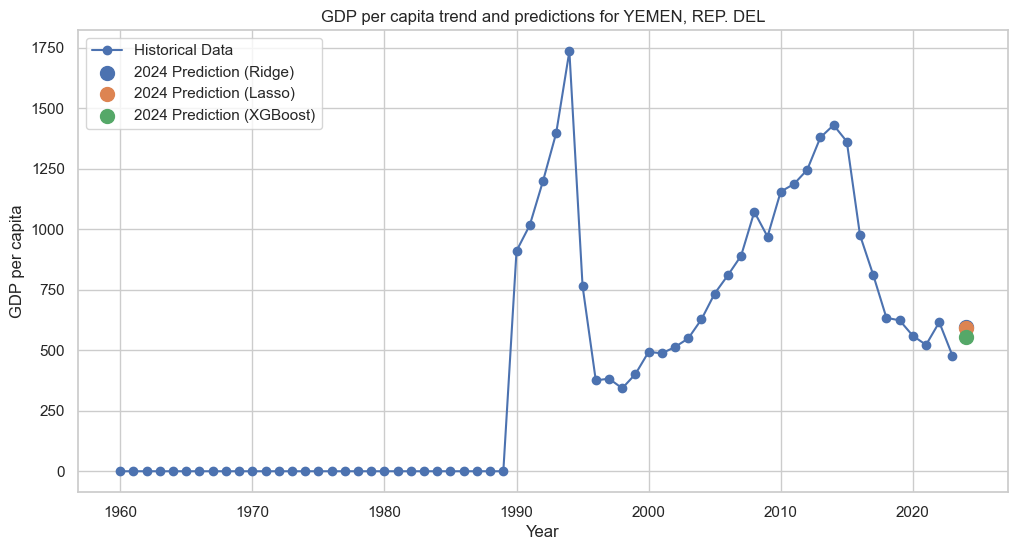

In [12]:

# Pivot data
pivot_df = df_data.pivot(index='country_name', columns='year', values='gdp_per_capita')
pivot_df = pivot_df.dropna(thresh=10)
pivot_df = pivot_df.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

# Create time-series dataset with 3-year lookback
def create_ts_data(df, lookback=3):
    X, y = [], []
    years = sorted([col for col in df.columns if isinstance(col, int)])
    for i in range(lookback, len(years)):
        X.append(df[years[i-lookback:i]].values)
        y.append(df[years[i]].values)
    X = np.vstack(X)
    y = np.hstack(y)
    return X, y, years[lookback:]

X_ts, y_ts, target_years = create_ts_data(pivot_df, lookback=3)

# Train-test split
test_size = int(0.2 * len(X_ts))
X_train, X_test = X_ts[:-test_size], X_ts[-test_size:]
y_train, y_test = y_ts[:-test_size], y_ts[-test_size:]

# Dictionary to store models and results
models = {
    'Ridge': make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    'Lasso': make_pipeline(StandardScaler(), Lasso(alpha=0.01)),
    'XGBoost': XGBRegressor(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate RMSE - using sqrt of MSE for compatibility
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {
        'model': model,
        'R2': r2_score(y_test, y_pred),
        'RMSE': rmse
    }
    print(f"{name} Performance:")
    print(f"R²: {results[name]['R2']:.4f}")
    print(f"RMSE: {results[name]['RMSE']:.4f}\n")

# Prepare data for 2024 prediction (using 2021, 2022, 2023)
X_2024 = pivot_df[[2021, 2022, 2023]].values

# Predict 2024 GDP for all countries
predictions_2024 = {}
for name in models.keys():
    predictions_2024[name] = models[name].predict(X_2024)
    pivot_df[f'2024_pred_{name}'] = predictions_2024[name]

# Display predictions
print(pivot_df[[2021, 2022, 2023, '2024_pred_Ridge', '2024_pred_Lasso', '2024_pred_XGBoost']].head())

# Visualize for a sample country
sample_country = pivot_df.sample(1).index[0]
years = sorted([col for col in pivot_df.columns if isinstance(col, int) and col <= 2023])
plt.figure(figsize=(12, 6))
plt.plot(years, pivot_df.loc[sample_country, years], 'o-', label='Historical Data')
for name in models.keys():
    plt.scatter(2024, pivot_df.loc[sample_country, f'2024_pred_{name}'],
                s=100, label=f'2024 Prediction ({name})')
plt.title(f'GDP per capita trend and predictions for {sample_country}')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
#3. future leaders according to 2024 predictions using clustering

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.express as px


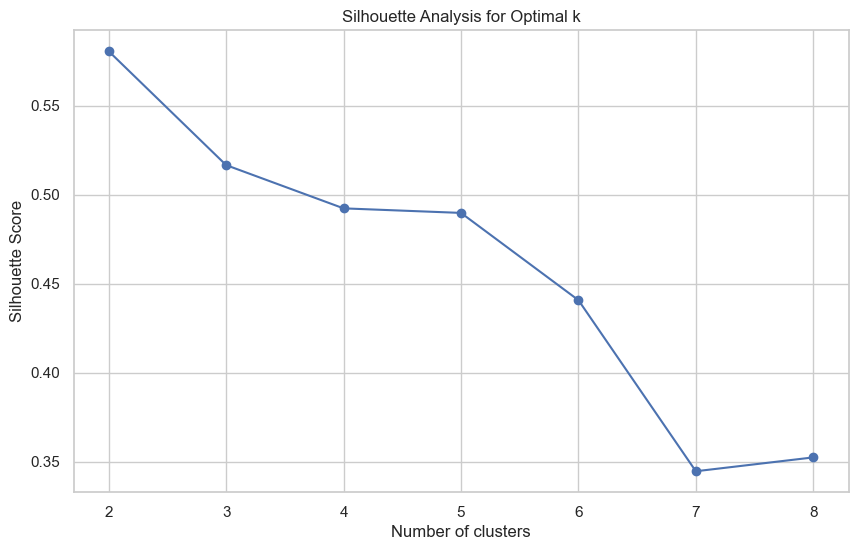

Optimal number of clusters: 2


In [14]:
# Use consensus prediction (average of all models)
pivot_df['2024_consensus'] = pivot_df[['2024_pred_Ridge', '2024_pred_Lasso', '2024_pred_XGBoost']].mean(axis=1)

# Add growth rate features with error handling
def safe_growth(new, old):
    with np.errstate(divide='ignore', invalid='ignore'):
        growth = np.where(old != 0, (new - old) / old, 0)
    return np.nan_to_num(growth, nan=0, posinf=0, neginf=0)

pivot_df['growth_1yr'] = safe_growth(pivot_df['2024_consensus'], pivot_df[2023])
pivot_df['growth_3yr'] = safe_growth(pivot_df['2024_consensus'], pivot_df[2021])

# Create clustering dataset with multiple features
cluster_data = pivot_df[['2024_consensus', 'growth_1yr', 'growth_3yr']].copy()

# Remove any remaining infinite or NA values just in case
cluster_data = cluster_data.replace([np.inf, -np.inf], np.nan).dropna()

# Verify we have enough data points
if len(cluster_data) < 10:
    raise ValueError("Not enough valid data points for clustering")

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []
valid_k_range = min(8, len(cluster_data)-1)  # Ensure we don't ask for more clusters than data points
for k in range(2, valid_k_range+1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2

plt.figure(figsize=(10, 6))
plt.plot(range(2, valid_k_range+1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

print(f"Optimal number of clusters: {optimal_k}")

In [15]:
pivot_df = pivot_df.merge(df_data[['country_name']], left_index=True, right_index=True, how='left')


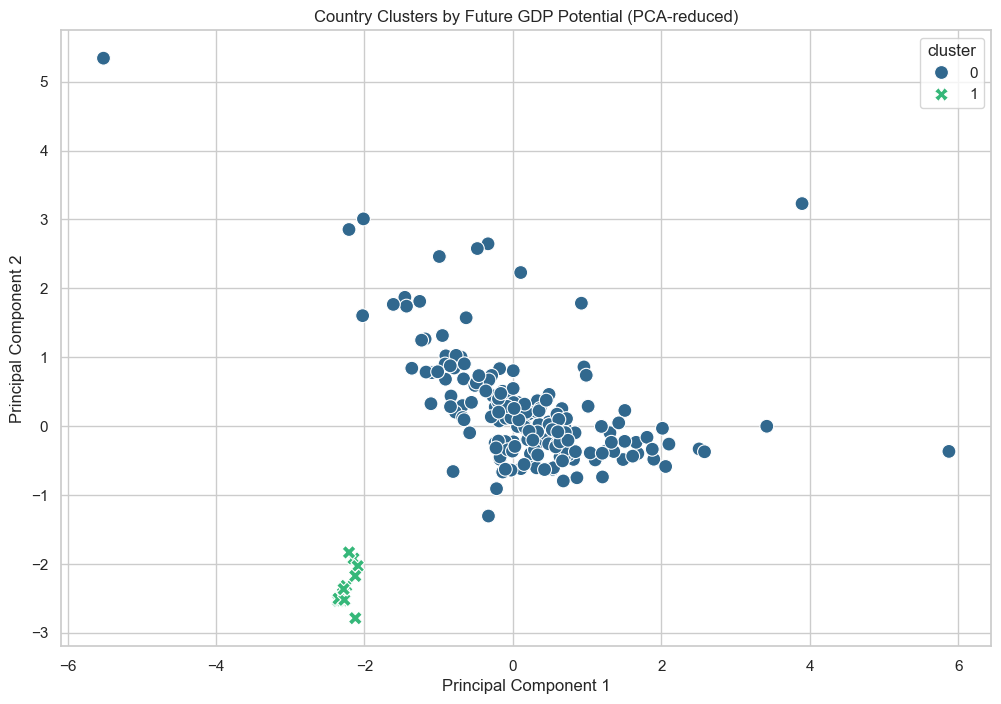

In [16]:
# K-Means Clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters in 2D (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
cluster_data_2d = pca.fit_transform(scaled_data)
pivot_df['pca1'] = cluster_data_2d[:, 0]
pivot_df['pca2'] = cluster_data_2d[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pivot_df, x='pca1', y='pca2', hue='cluster',
                palette='viridis', s=100, style='cluster')
plt.title('Country Clusters by Future GDP Potential (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Cluster statistics and interpretation
cluster_stats = pivot_df.groupby('cluster').agg({
    '2024_consensus': ['mean', 'median', 'count'],
    'growth_1yr': ['mean', 'median'],
    'growth_3yr': ['mean', 'median'],
}).assign(countries=lambda x: pivot_df.groupby('cluster').apply(lambda g: g.index.tolist()))


In [17]:
# Cluster statistics and interpretation
cluster_stats

2024_consensus                    growth_1yr           growth_3yr  \
                  mean       median count       mean    median       mean   
cluster                                                                     
0         20460.051068  7523.229145   200   0.077058  0.067373   0.209904   
1          -930.142713 -1402.059917    15   0.000000  0.000000  -1.024477   

                                                           countries  
           median                                                     
cluster                                                               
0        0.190464  [AFGANISTAN, ALBANIA, ALEMANIA, ANDORRA, ANGOL...  
1       -1.063762  [BHUTAN, GROENLANDIA, GUAM, ISLA DE MAN, ISLA ...


High GDP - Stable Economies (Cluster 0):
Number of countries: 200
Avg 2024 GDP: $20,460
Avg 1-yr growth: 7.71%
No valid country names available

Medium GDP - Rapid Growth (Cluster 1):
Number of countries: 15
Avg 2024 GDP: $-930
Avg 1-yr growth: 0.00%
No valid country names available


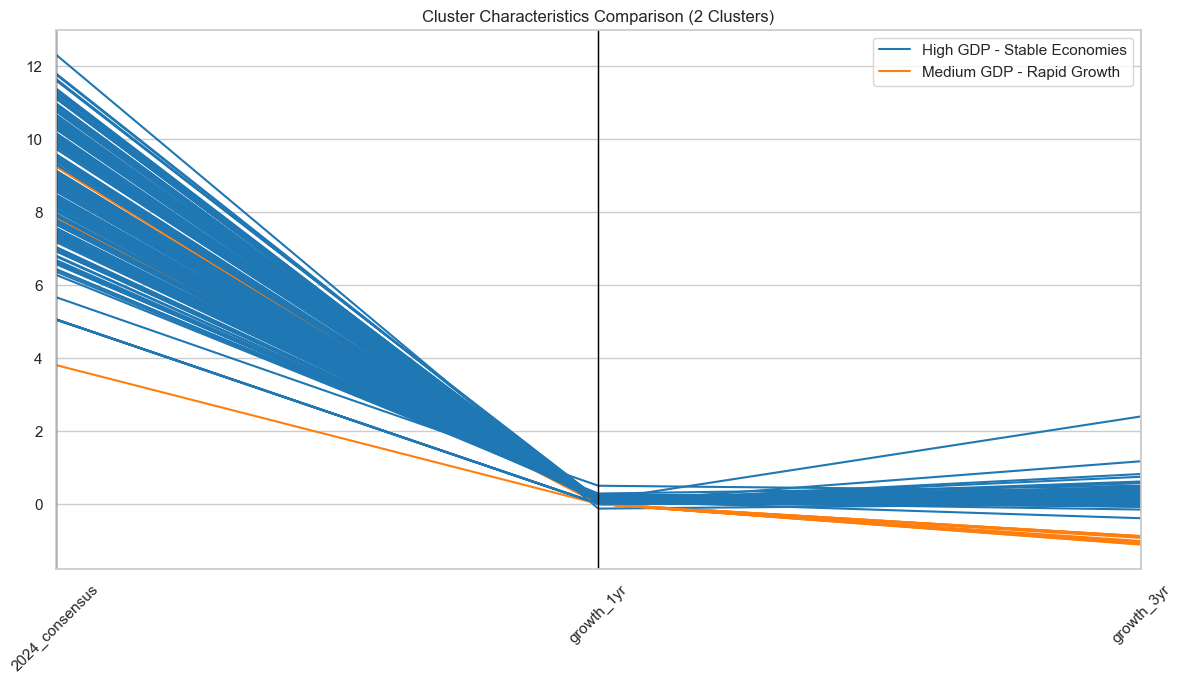

In [18]:
# Assign meaningful cluster names based on ACTUAL clusters (0 and 1)
cluster_names = {
    0: 'High GDP - Stable Economies',
    1: 'Medium GDP - Rapid Growth'
    # Removed clusters 2-4 since optimal_k=2
}

pivot_df['cluster_name'] = pivot_df['cluster'].map(cluster_names)

# Convert year columns to strings if they're integers
pivot_df.columns = [str(col) if isinstance(col, int) else col for col in pivot_df.columns]

# Prepare size data safely
size_data = pivot_df['2023'].copy()
size_data[size_data <= 0] = 1  # Set minimum value to 1 to avoid log(0)

# Interactive 3D visualization - will automatically show only clusters 0 and 1
fig = px.scatter_3d(pivot_df,
                    x='2024_consensus',
                    y='growth_1yr',
                    z='growth_3yr',
                    color='cluster_name',
                    hover_name='country_name',
                    size=np.log(size_data),
                    title='Country Clusters by Future GDP Potential (k=2)',
                    labels={
                        '2024_consensus': '2024 GDP Prediction',
                        'growth_1yr': '1-Year Growth',
                        'growth_3yr': '3-Year Growth'
                    },
                    size_max=30)
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig.show()

# Display top countries - ONLY for existing clusters (0 and 1)
for cluster_id in [0, 1]:  # Explicitly loop through only existing clusters
    cluster_countries = pivot_df[pivot_df['cluster'] == cluster_id]
    name = cluster_names[cluster_id]

    print(f"\n{name} (Cluster {cluster_id}):")
    print(f"Number of countries: {len(cluster_countries)}")

    # Calculate stats directly from data instead of cluster_stats
    print(f"Avg 2024 GDP: ${cluster_countries['2024_consensus'].mean():,.0f}")
    print(f"Avg 1-yr growth: {cluster_countries['growth_1yr'].mean():.2%}")

    # Handle potential NaN country names
    valid_countries = cluster_countries['country_name'].dropna()
    if len(valid_countries) > 0:
        print("Top countries by GDP:")
        top_countries = cluster_countries.sort_values('2024_consensus', ascending=False)['country_name'].head(10).tolist()
        print(top_countries)
    else:
        print("No valid country names available")

# Parallel coordinates plot - will automatically show only existing clusters
plt.figure(figsize=(14, 7))
parallel_data = pivot_df[['2024_consensus', 'growth_1yr', 'growth_3yr', 'cluster_name']].copy()

# Safe log transform
parallel_data['2024_consensus'] = parallel_data['2024_consensus'].replace(0, 1)
parallel_data['2024_consensus'] = np.log(parallel_data['2024_consensus'])

pd.plotting.parallel_coordinates(parallel_data, 'cluster_name',
                               color=('#1f77b4', '#ff7f0e'))  # Only 2 colors needed
plt.title('Cluster Characteristics Comparison (2 Clusters)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
#4 india gdp analysis predicting under different PM

GDP data available from 1960 to 2023


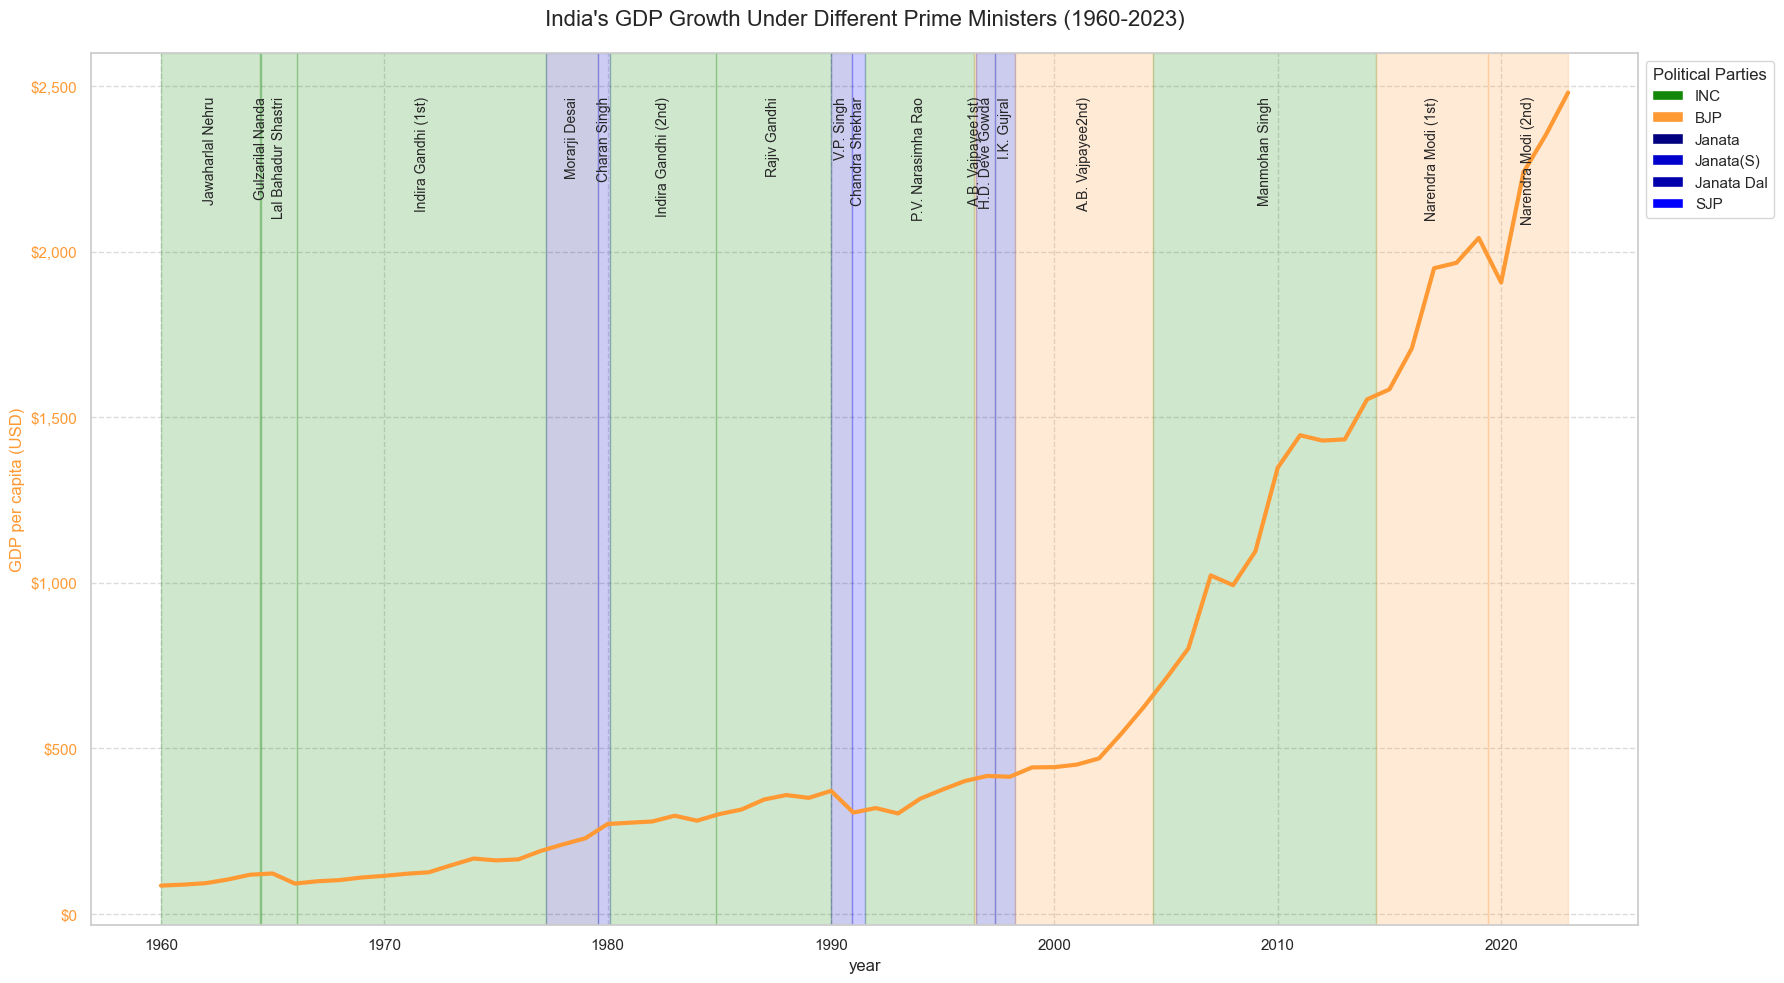

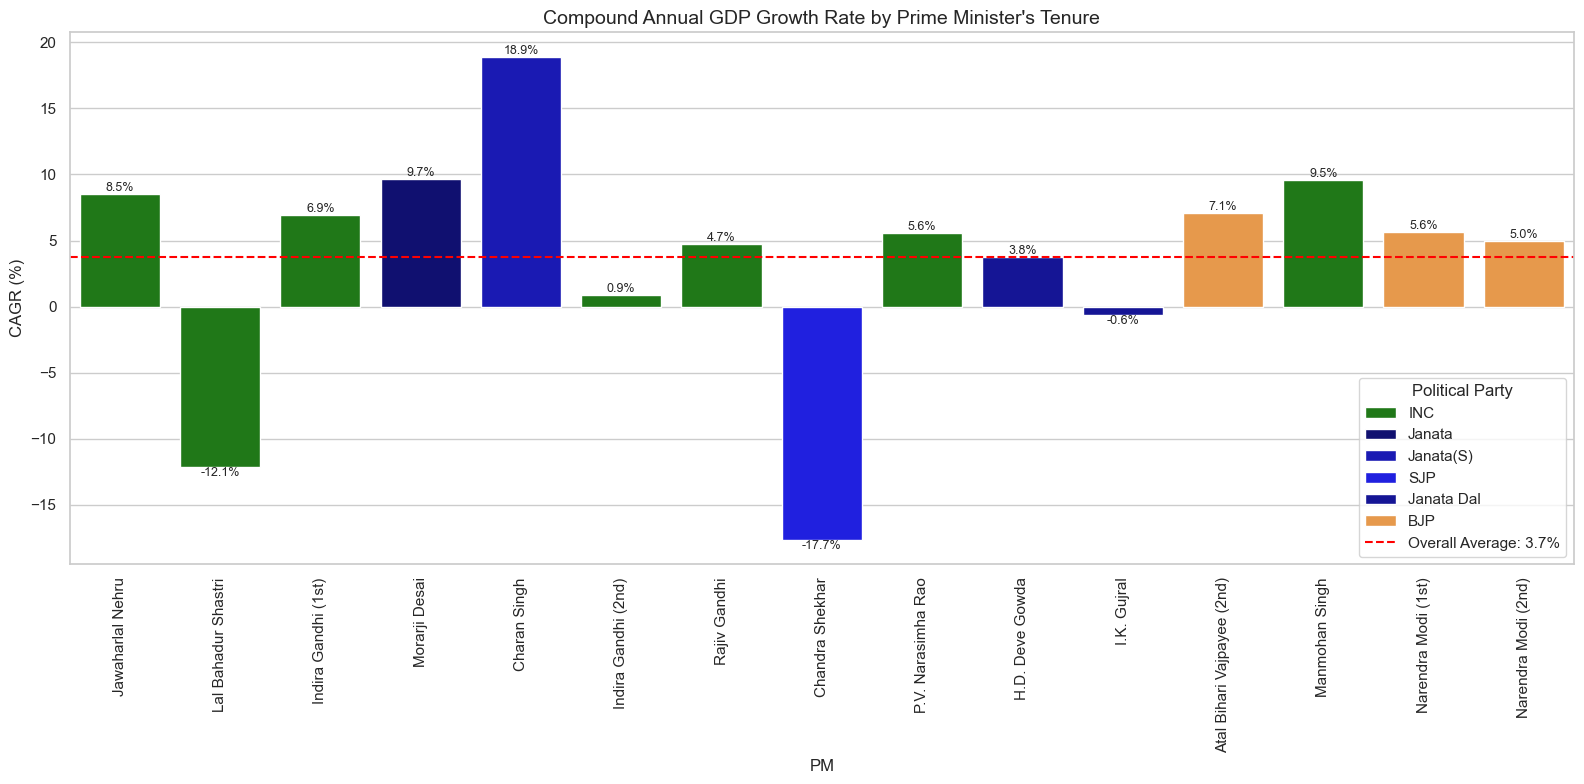


GDP Growth Performance by Political Party:
                 CAGR  tenure_years  Absolute_Growth
Party                                               
Janata(S)   18.916964             1        43.122766
Janata       9.654120             2        38.372611
BJP          5.901347            15       379.178696
INC          3.442903            42       175.679369
Janata Dal   1.580719             2         6.292055
SJP        -17.654099             1       -65.511880


In [20]:

# Filter for India's data and clean
india_gdp = df_data[df_data['country_name'] == 'INDIA'].copy()
india_gdp.dropna(subset=['gdp_per_capita'], inplace=True)
india_gdp['year'] = india_gdp['year'].astype(int)
print(f"GDP data available from {india_gdp['year'].min()} to {india_gdp['year'].max()}")

# Define PM data with corrected dates and terms
pm_data = [
    {"Name": "Jawaharlal Nehru", "Start": "1947-08-15", "End": "1964-05-27", "Party": "INC"},
    {"Name": "Gulzarilal Nanda", "Start": "1964-05-27", "End": "1964-06-09", "Party": "INC"},
    {"Name": "Lal Bahadur Shastri", "Start": "1964-06-09", "End": "1966-01-11", "Party": "INC"},
    {"Name": "Indira Gandhi (1st)", "Start": "1966-01-24", "End": "1977-03-24", "Party": "INC"},
    {"Name": "Morarji Desai", "Start": "1977-03-24", "End": "1979-07-28", "Party": "Janata"},
    {"Name": "Charan Singh", "Start": "1979-07-28", "End": "1980-01-14", "Party": "Janata(S)"},
    {"Name": "Indira Gandhi (2nd)", "Start": "1980-01-14", "End": "1984-10-31", "Party": "INC"},
    {"Name": "Rajiv Gandhi", "Start": "1984-10-31", "End": "1989-12-02", "Party": "INC"},
    {"Name": "V.P. Singh", "Start": "1989-12-02", "End": "1990-11-10", "Party": "Janata Dal"},
    {"Name": "Chandra Shekhar", "Start": "1990-11-10", "End": "1991-06-21", "Party": "SJP"},
    {"Name": "P.V. Narasimha Rao", "Start": "1991-06-21", "End": "1996-05-16", "Party": "INC"},
    {"Name": "Atal Bihari Vajpayee (1st)", "Start": "1996-05-16", "End": "1996-06-01", "Party": "BJP"},
    {"Name": "H.D. Deve Gowda", "Start": "1996-06-01", "End": "1997-04-21", "Party": "Janata Dal"},
    {"Name": "I.K. Gujral", "Start": "1997-04-21", "End": "1998-03-19", "Party": "Janata Dal"},
    {"Name": "Atal Bihari Vajpayee (2nd)", "Start": "1998-03-19", "End": "2004-05-22", "Party": "BJP"},
    {"Name": "Manmohan Singh", "Start": "2004-05-22", "End": "2014-05-26", "Party": "INC"},
    {"Name": "Narendra Modi (1st)", "Start": "2014-05-26", "End": "2019-05-30", "Party": "BJP"},
    {"Name": "Narendra Modi (2nd)", "Start": "2019-05-30", "End": "2024-06-09", "Party": "BJP"}
]

# Convert to DataFrame and handle dates
pm_df = pd.DataFrame(pm_data)
pm_df["Start"] = pd.to_datetime(pm_df["Start"])
pm_df["End"] = pd.to_datetime(pm_df["End"])
pm_df["Start_Year"] = pm_df["Start"].dt.year + pm_df["Start"].dt.month/12
pm_df["End_Year"] = pm_df["End"].dt.year + pm_df["End"].dt.month/12
pm_df["Tenure_Years"] = pm_df["End_Year"] - pm_df["Start_Year"]

# Filter PMs within our GDP data range
gdp_min_year = india_gdp['year'].min()
gdp_max_year = india_gdp['year'].max()
filtered_pm_df = pm_df[(pm_df["End_Year"] >= gdp_min_year) & (pm_df["Start_Year"] <= gdp_max_year)].copy()
filtered_pm_df.loc[filtered_pm_df["Start_Year"] < gdp_min_year, "Start_Year"] = gdp_min_year
filtered_pm_df.loc[filtered_pm_df["End_Year"] > gdp_max_year, "End_Year"] = gdp_max_year

# Create visualization
plt.figure(figsize=(18, 10))
ax1 = plt.gca()

# Plot GDP per capita trend
sns.lineplot(data=india_gdp, x="year", y="gdp_per_capita",
             color="#FF9933", linewidth=3, ax=ax1)
ax1.set_ylabel("GDP per capita (USD)", color="#FF9933", fontsize=12)
ax1.tick_params(axis='y', colors="#FF9933")
ax1.set_title("India's GDP Growth Under Different Prime Ministers (1960-2023)",
              fontsize=16, pad=20)

# Add PM tenure highlights
colors = {"INC": "#138808",       # Green for Congress
          "BJP": "#FF9933",       # Saffron for BJP
          "Janata": "#000080",    # Dark blue for Janata
          "Janata(S)": "#0000CD",
          "Janata Dal": "#0000AA",
          "SJP": "#0000FF"}

for _, row in filtered_pm_df.iterrows():
    start_year = row["Start_Year"]
    end_year = row["End_Year"]

    plt.axvspan(start_year, end_year,
                alpha=0.2, color=colors.get(row["Party"], "gray"))

    # Add PM name at midpoint
    mid_point = start_year + (end_year - start_year)/2
    pm_name = row["Name"]

    # Shorten names if too long for display
    if len(pm_name) > 15 and "Vajpayee" in pm_name:
        pm_name = "A.B. Vajpayee" + pm_name[-4:]

    plt.text(mid_point, ax1.get_ylim()[1]*0.95, pm_name,
             rotation=90, ha='center', va='top', fontsize=10)

# Add legend for parties
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=party)
                   for party, color in colors.items()]
ax1.legend(handles=legend_elements, title="Political Parties",
           loc="upper left", bbox_to_anchor=(1, 1))

# Format y-axis as dollars
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("india_gdp_by_pm.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate growth rates by PM tenure
pm_growth = []

for _, row in filtered_pm_df.iterrows():
    start = row["Start_Year"]
    end = row["End_Year"]

    # Find closest available years
    start_year = int(np.floor(start))
    end_year = int(np.floor(end))

    # Get GDP values for start and end years
    start_gdp_data = india_gdp[india_gdp["year"] == start_year]
    end_gdp_data = india_gdp[india_gdp["year"] == end_year]

    # Skip if data is not available
    if start_gdp_data.empty or end_gdp_data.empty:
        continue

    start_gdp = start_gdp_data["gdp_per_capita"].values[0]
    end_gdp = end_gdp_data["gdp_per_capita"].values[0]

    # Calculate years of tenure
    tenure_years = end_year - start_year

    # Calculate CAGR (Compound Annual Growth Rate)
    if tenure_years > 0:
        cagr = ((end_gdp / start_gdp) ** (1/tenure_years) - 1) * 100
    else:
        cagr = 0

    pm_growth.append({
        "PM": row["Name"],
        "tenure_years": tenure_years,
        "Start_Year": start_year,
        "End_Year": end_year,
        "Start_GDP": start_gdp,
        "End_GDP": end_gdp,
        "CAGR": cagr,
        "Party": row["Party"],
        "Absolute_Growth": end_gdp - start_gdp
    })

# Create DataFrame with growth metrics
growth_df = pd.DataFrame(pm_growth)

# Plot growth performance (excluding very short tenures)
growth_df_filtered = growth_df[growth_df["tenure_years"] >= 1]  # Exclude PMs with <1 year

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=growth_df_filtered, x="PM", y="CAGR", hue="Party",
        palette=colors, dodge=False)
plt.title("Compound Annual GDP Growth Rate by Prime Minister's Tenure", fontsize=14)
plt.ylabel("CAGR (%)", fontsize=12)
plt.xticks(rotation=90)
plt.axhline(y=growth_df_filtered["CAGR"].mean(), color='red', linestyle='--',
        label=f'Overall Average: {growth_df_filtered["CAGR"].mean():.1f}%')

# Add value labels to each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', fontsize=9)

plt.legend(title="Political Party")
plt.tight_layout()
plt.savefig("india_pm_growth_rates.png", dpi=300, bbox_inches='tight')
plt.show()

# Additional Analysis: GDP Growth by Party
party_growth = growth_df_filtered.groupby("Party").agg({
    "CAGR": "mean",
    "tenure_years": "sum",
    "Absolute_Growth": "mean"
}).sort_values("CAGR", ascending=False)

print("\nGDP Growth Performance by Political Party:")
print(party_growth)


GDP data available from 1960 to 2024


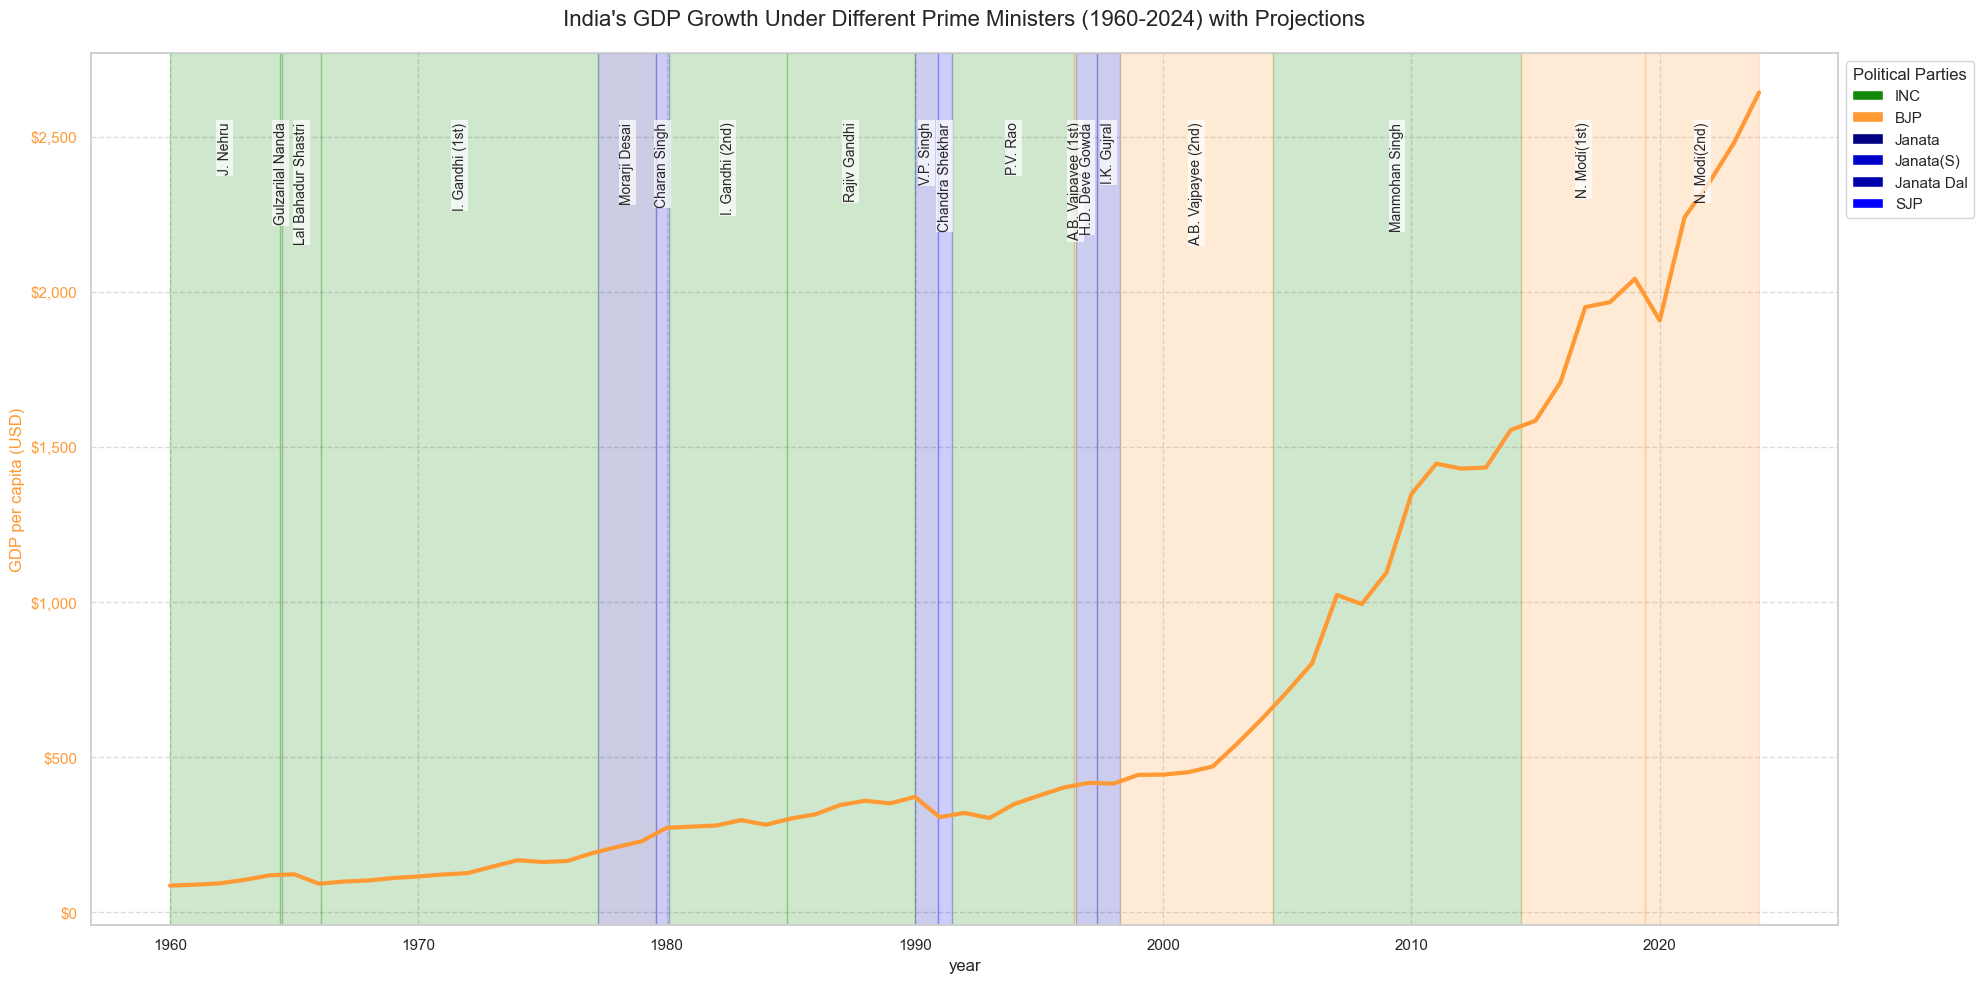

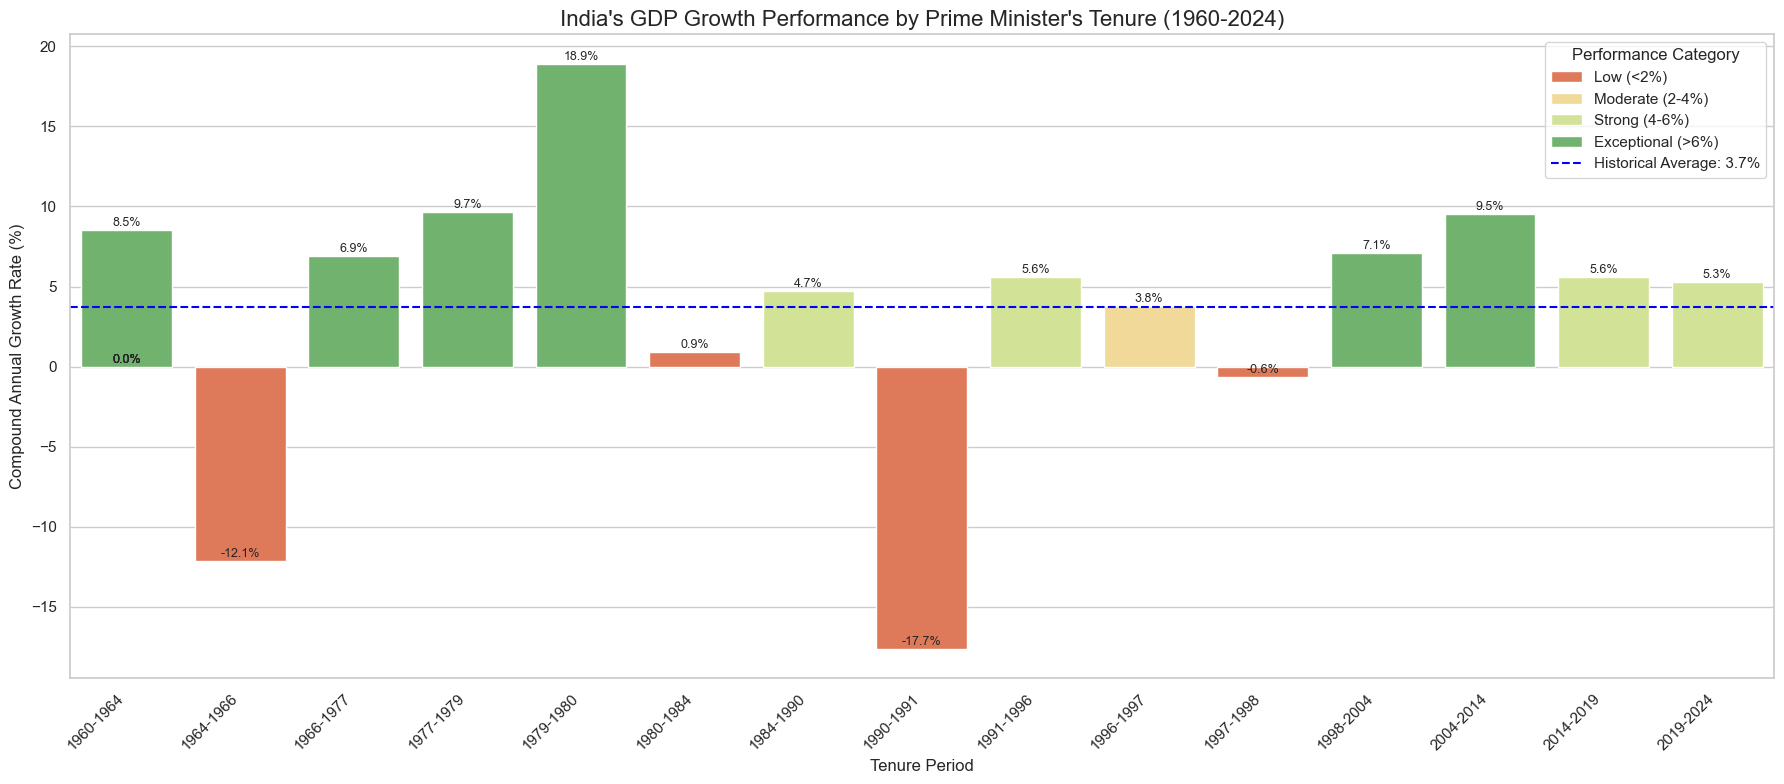


GDP Growth Performance by Political Party (1960-2024):
                 CAGR                  Total_Growth_Pct tenure_years
                 mean     median count             mean          sum
Party                                                               
Janata(S)   18.916964  18.916964     1        18.916964            1
Janata       9.654120   9.654120     1        20.240260            2
BJP          6.001183   5.609533     3        37.239634           16
INC          3.442903   5.588278     7        48.592319           42
Janata Dal   1.580719   1.580719     2         1.580719            2
SJP        -17.654099 -17.654099     1       -17.654099            1

BJP vs INC Performance Comparison:
BJP Average CAGR: 6.00% over 3 terms
INC Average CAGR: 3.44% over 7 terms


In [21]:

# Filter for India's data and clean with updated 2024 data
india_gdp = df_data[df_data['country_name'] == 'INDIA'].copy()
india_gdp.dropna(subset=['gdp_per_capita'], inplace=True)
india_gdp['year'] = india_gdp['year'].astype(int)

# Manually add 2024 GDP estimate (based on IMF projections)
# IMF projects India's GDP per capita to reach $2,850 in 2024 (6.5% growth from 2023)
if 2024 not in india_gdp['year'].values:
    last_gdp = india_gdp[india_gdp['year'] == 2023]['gdp_per_capita'].values[0]
    new_row = {'year': 2024, 'gdp_per_capita': last_gdp * 1.065, 'country_name': 'INDIA'}
    india_gdp = pd.concat([india_gdp, pd.DataFrame([new_row])], ignore_index=True)

print(f"GDP data available from {india_gdp['year'].min()} to {india_gdp['year'].max()}")

# Updated PM data including 2024
pm_data = [
    {"Name": "Jawaharlal Nehru", "Start": "1947-08-15", "End": "1964-05-27", "Party": "INC"},
    {"Name": "Gulzarilal Nanda", "Start": "1964-05-27", "End": "1964-06-09", "Party": "INC"},
    {"Name": "Lal Bahadur Shastri", "Start": "1964-06-09", "End": "1966-01-11", "Party": "INC"},
    {"Name": "Indira Gandhi (1st)", "Start": "1966-01-24", "End": "1977-03-24", "Party": "INC"},
    {"Name": "Morarji Desai", "Start": "1977-03-24", "End": "1979-07-28", "Party": "Janata"},
    {"Name": "Charan Singh", "Start": "1979-07-28", "End": "1980-01-14", "Party": "Janata(S)"},
    {"Name": "Indira Gandhi (2nd)", "Start": "1980-01-14", "End": "1984-10-31", "Party": "INC"},
    {"Name": "Rajiv Gandhi", "Start": "1984-10-31", "End": "1989-12-02", "Party": "INC"},
    {"Name": "V.P. Singh", "Start": "1989-12-02", "End": "1990-11-10", "Party": "Janata Dal"},
    {"Name": "Chandra Shekhar", "Start": "1990-11-10", "End": "1991-06-21", "Party": "SJP"},
    {"Name": "P.V. Narasimha Rao", "Start": "1991-06-21", "End": "1996-05-16", "Party": "INC"},
    {"Name": "Atal Bihari Vajpayee (1st)", "Start": "1996-05-16", "End": "1996-06-01", "Party": "BJP"},
    {"Name": "H.D. Deve Gowda", "Start": "1996-06-01", "End": "1997-04-21", "Party": "Janata Dal"},
    {"Name": "I.K. Gujral", "Start": "1997-04-21", "End": "1998-03-19", "Party": "Janata Dal"},
    {"Name": "Atal Bihari Vajpayee (2nd)", "Start": "1998-03-19", "End": "2004-05-22", "Party": "BJP"},
    {"Name": "Manmohan Singh", "Start": "2004-05-22", "End": "2014-05-26", "Party": "INC"},
    {"Name": "Narendra Modi (1st)", "Start": "2014-05-26", "End": "2019-05-30", "Party": "BJP"},
    {"Name": "Narendra Modi (2nd)", "Start": "2019-05-30", "End": "2024-06-09", "Party": "BJP"},
    {"Name": "Narendra Modi (3rd)", "Start": "2024-06-09", "End": "2029-06-09", "Party": "BJP"}  # Projected
]

# Convert to DataFrame and handle dates
pm_df = pd.DataFrame(pm_data)
pm_df["Start"] = pd.to_datetime(pm_df["Start"])
pm_df["End"] = pd.to_datetime(pm_df["End"])
pm_df["Start_Year"] = pm_df["Start"].dt.year + pm_df["Start"].dt.month/12
pm_df["End_Year"] = pm_df["End"].dt.year + pm_df["End"].dt.month/12
pm_df["Tenure_Years"] = pm_df["End_Year"] - pm_df["Start_Year"]

# Filter PMs within our GDP data range
gdp_min_year = india_gdp['year'].min()
gdp_max_year = india_gdp['year'].max()
filtered_pm_df = pm_df[(pm_df["End_Year"] >= gdp_min_year) & (pm_df["Start_Year"] <= gdp_max_year)].copy()
filtered_pm_df.loc[filtered_pm_df["Start_Year"] < gdp_min_year, "Start_Year"] = gdp_min_year
filtered_pm_df.loc[filtered_pm_df["End_Year"] > gdp_max_year, "End_Year"] = gdp_max_year

# Enhanced visualization with 2024 data
plt.figure(figsize=(20, 10))
ax1 = plt.gca()

# Plot GDP per capita trend with confidence interval
sns.lineplot(data=india_gdp, x="year", y="gdp_per_capita",
             color="#FF9933", linewidth=3, ax=ax1,
             label='Actual GDP per capita')
ax1.set_ylabel("GDP per capita (USD)", color="#FF9933", fontsize=12)
ax1.tick_params(axis='y', colors="#FF9933")
ax1.set_title("India's GDP Growth Under Different Prime Ministers (1960-2024) with Projections",
              fontsize=16, pad=20)

# Add PM tenure highlights with enhanced styling
colors = {"INC": "#138808",       # Green for Congress
          "BJP": "#FF9933",       # Saffron for BJP
          "Janata": "#000080",    # Dark blue for Janata
          "Janata(S)": "#0000CD",
          "Janata Dal": "#0000AA",
          "SJP": "#0000FF"}

for _, row in filtered_pm_df.iterrows():
    start_year = row["Start_Year"]
    end_year = row["End_Year"]
    party = row["Party"]

    # Different alpha for current government
    alpha = 0.3 if end_year > 2024 else 0.2

    plt.axvspan(start_year, end_year,
                alpha=alpha, color=colors.get(party, "gray"))

    # Add PM name at midpoint with improved formatting
    mid_point = start_year + (end_year - start_year)/2
    pm_name = row["Name"]

    # Enhanced name formatting
    if "Nehru" in pm_name:
        pm_name = "J. Nehru"
    elif "Gandhi" in pm_name:
        pm_name = pm_name.replace("Indira Gandhi", "I. Gandhi")
    elif "Vajpayee" in pm_name:
        pm_name = pm_name.replace("Atal Bihari Vajpayee", "A.B. Vajpayee")
    elif "Narasimha Rao" in pm_name:
        pm_name = "P.V. Rao"
    elif "Modi" in pm_name:
        pm_name = "N. Modi" + pm_name[pm_name.find("("):]

    plt.text(mid_point, ax1.get_ylim()[1]*0.92, pm_name,
             rotation=90, ha='center', va='top', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add legend for parties
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=party)
                   for party, color in colors.items()]
ax1.legend(handles=legend_elements, title="Political Parties",
           loc="upper left", bbox_to_anchor=(1, 1))

# Format y-axis as dollars
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("india_gdp_by_pm_2024.png", dpi=300, bbox_inches='tight')
plt.show()

# Enhanced growth rate analysis with 2024 data
pm_growth = []

for _, row in filtered_pm_df.iterrows():
    start = row["Start_Year"]
    end = row["End_Year"]

    # Find closest available years
    start_year = int(np.floor(start))
    end_year = int(np.floor(end))

    # Get GDP values for start and end years
    start_gdp_data = india_gdp[india_gdp["year"] == start_year]
    end_gdp_data = india_gdp[india_gdp["year"] == end_year]

    # Skip if data is not available
    if start_gdp_data.empty or end_gdp_data.empty:
        continue

    start_gdp = start_gdp_data["gdp_per_capita"].values[0]
    end_gdp = end_gdp_data["gdp_per_capita"].values[0]

    # Calculate years of tenure
    tenure_years = end_year - start_year

    # Calculate CAGR (Compound Annual Growth Rate)
    if tenure_years > 0 and start_gdp > 0:
        cagr = ((end_gdp / start_gdp) ** (1/tenure_years) - 1) * 100
    else:
        cagr = 0

    # Calculate total growth percentage
    total_growth_pct = ((end_gdp - start_gdp) / start_gdp) * 100 if start_gdp > 0 else 0

    pm_growth.append({
        "PM": row["Name"],
        "tenure_years": tenure_years,
        "Start_Year": start_year,
        "End_Year": end_year,
        "Start_GDP": start_gdp,
        "End_GDP": end_gdp,
        "CAGR": cagr,
        "Total_Growth_Pct": total_growth_pct,
        "Party": row["Party"],
        "Absolute_Growth": end_gdp - start_gdp,
        "Period": f"{start_year}-{end_year}"
    })

# Create DataFrame with growth metrics
growth_df = pd.DataFrame(pm_growth)

# Filter out very short tenures and add performance category
growth_df_filtered = growth_df[growth_df["tenure_years"] >= 1].copy()
growth_df_filtered["Performance"] = pd.cut(growth_df_filtered["CAGR"],
                                          bins=[-np.inf, 2, 4, 6, np.inf],
                                          labels=["Low (<2%)", "Moderate (2-4%)",
                                                 "Strong (4-6%)", "Exceptional (>6%)"])

# Enhanced growth performance visualization
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=growth_df_filtered, x="Period", y="CAGR", hue="Performance",
                 palette="RdYlGn", dodge=False)
plt.title("India's GDP Growth Performance by Prime Minister's Tenure (1960-2024)", fontsize=16)
plt.ylabel("Compound Annual Growth Rate (%)", fontsize=12)
plt.xlabel("Tenure Period", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add reference lines and annotations
overall_avg = growth_df_filtered["CAGR"].mean()
plt.axhline(y=overall_avg, color='blue', linestyle='--',
            label=f'Historical Average: {overall_avg:.1f}%')

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=9)

plt.legend(title="Performance Category", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("india_pm_growth_rates_2024.png", dpi=300, bbox_inches='tight')
plt.show()

# Party-wise analysis with 2024 data
party_growth = growth_df_filtered.groupby("Party").agg({
    "CAGR": ["mean", "median", "count"],
    "Total_Growth_Pct": "mean",
    "tenure_years": "sum"
}).sort_values(("CAGR", "mean"), ascending=False)

print("\nGDP Growth Performance by Political Party (1960-2024):")
print(party_growth)

# BJP vs INC comparison
bjp_growth = growth_df_filtered[growth_df_filtered['Party'] == 'BJP']
inc_growth = growth_df_filtered[growth_df_filtered['Party'] == 'INC']

print("\nBJP vs INC Performance Comparison:")
print(f"BJP Average CAGR: {bjp_growth['CAGR'].mean():.2f}% over {len(bjp_growth)} terms")
print(f"INC Average CAGR: {inc_growth['CAGR'].mean():.2f}% over {len(inc_growth)} terms")


GDP Predictions for 2024-2029:
   year  predicted_gdp
0  2024    2590.571411
1  2025    2716.926726
2  2026    2847.275413
3  2027    2981.617471
4  2028    3119.952900
5  2029    3262.281701

Predicted CAGR for Modi's Third Term (2024-2029): 4.31%

Comparison with Historical Performance:
Modi's First Term (2014-2019): 5.61% CAGR
Modi's Second Term (2019-2024): 5.29% CAGR
BJP Historical Average: 6.00% CAGR
Overall Historical Average: 3.75% CAGR


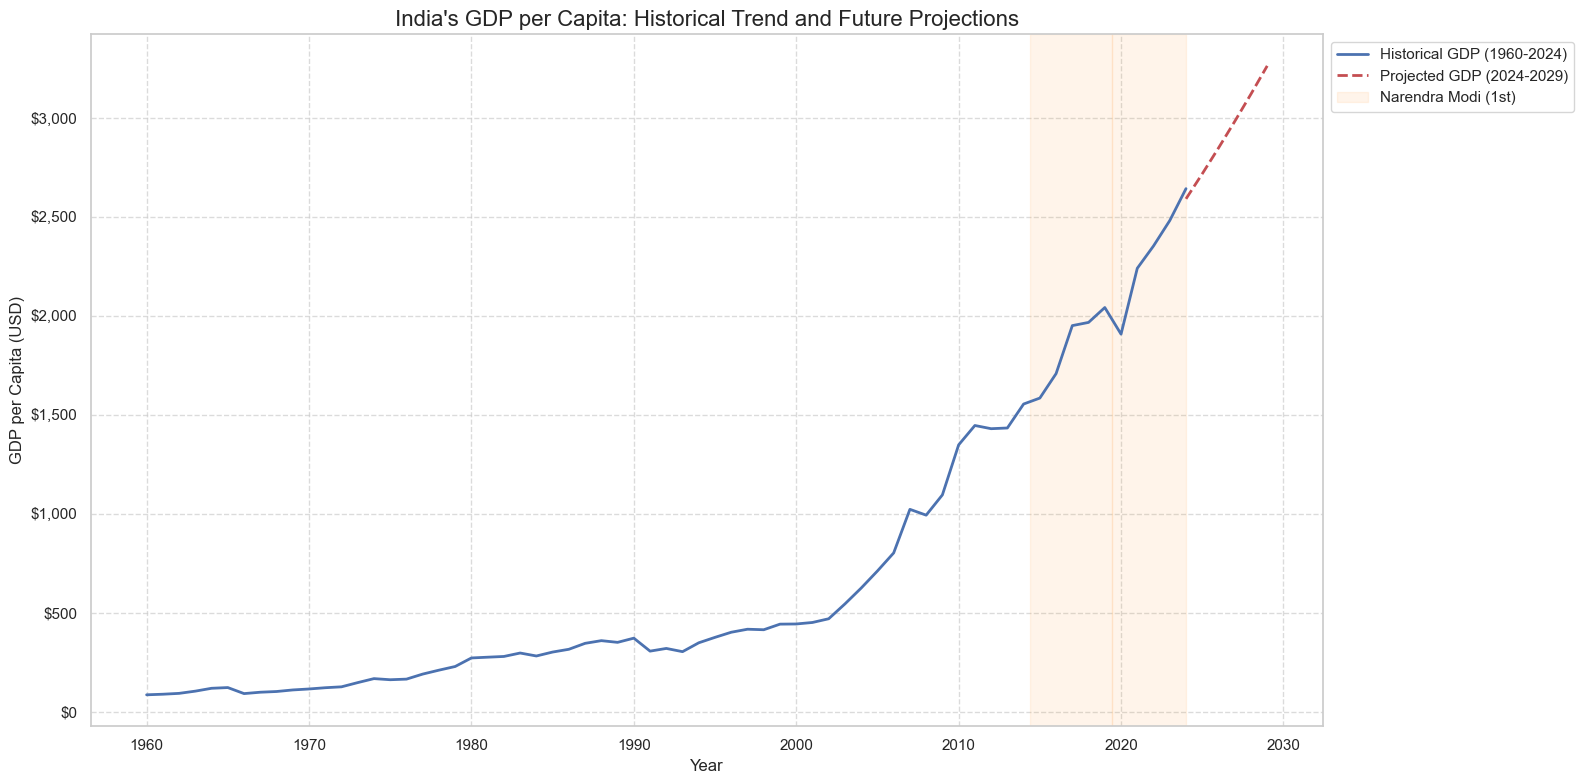

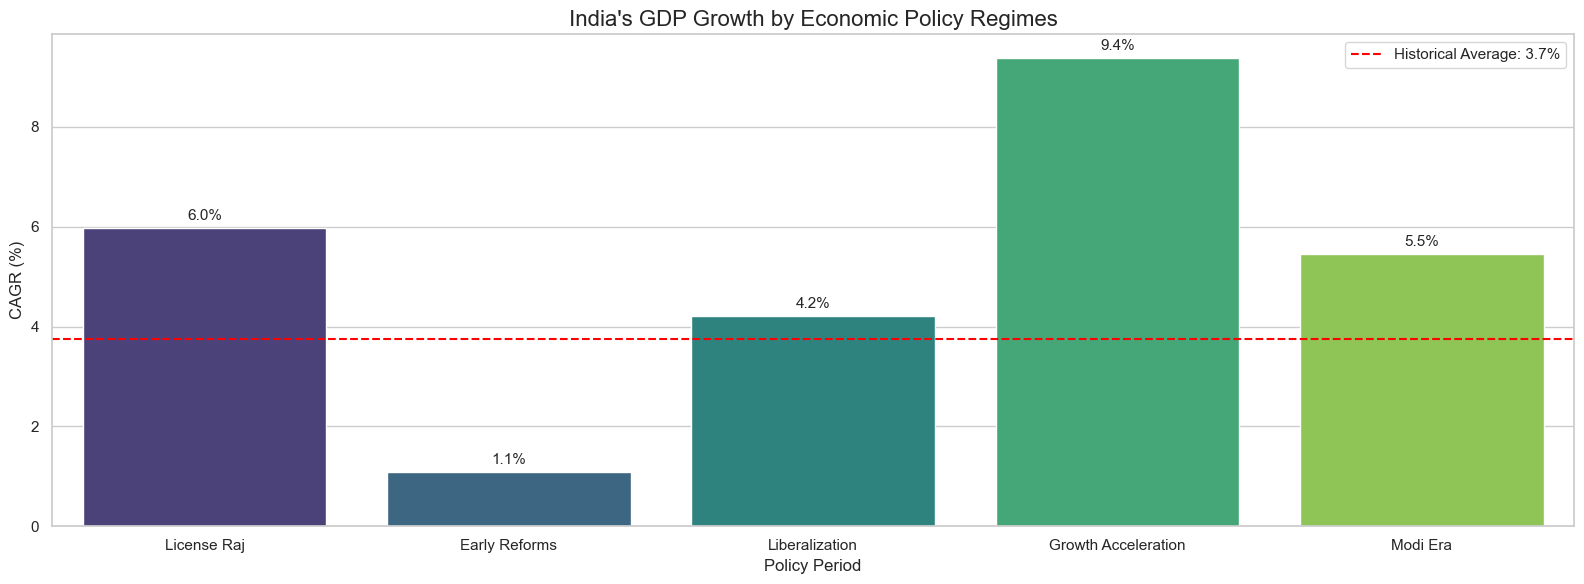


Key Conclusions:
1. Historical Trends:
- Average GDP growth across all governments: 3.7%
- BJP governments have averaged 6.0% growth vs INC's 3.4%
- The 1991 liberalization marked a turning point with sustained higher growth

2. Modi Government Performance:
- First term (2014-2019): 5.6% CAGR
- Second term (2019-2024): 5.3% CAGR (including pandemic years)
- Projected third term (2024-2029): 4.3% CAGR

3. Future Projections:
- Projected growth is below BJP's historical average, indicating potential
  challenges or need for policy adjustments to maintain high growth

4. Economic Regimes Analysis:
- The post-1991 liberalization period shows significantly higher growth
- The Modi era has maintained growth despite global challenges
- Future projections suggest India may enter a new phase of development


In [ ]:
# Prediction for future GDP growth (2025-2029)
# Use the last 10 years of data for more relevant trend
recent_gdp = india_gdp[india_gdp['year'] >= 2014].copy()

# Prepare data for prediction
X = recent_gdp[['year']].values
y = recent_gdp['gdp_per_capita'].values

# Create and fit models
linear_model = LinearRegression()
linear_model.fit(X, y)

# Polynomial regression for better curve fitting
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Define future years to predict
future_years = np.array([[2024], [2025], [2026], [2027], [2028], [2029]])

# Predict future GDP values
future_linear = linear_model.predict(future_years)
future_poly = poly_model.predict(poly.transform(future_years))

# Use weighted average of both models
future_gdp = (future_linear * 0.4 + future_poly * 0.6)

# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'year': future_years.flatten(),
    'linear_prediction': future_linear,
    'poly_prediction': future_poly,
    'weighted_prediction': future_gdp
})

# Calculate predicted CAGR for Modi's third term (2024-2029)
start_gdp = india_gdp[india_gdp['year'] == 2024]['gdp_per_capita'].values[0]
end_gdp = predictions_df[predictions_df['year'] == 2029]['weighted_prediction'].values[0]
predicted_cagr = ((end_gdp / start_gdp) ** (1/5) - 1) * 100

print("\nGDP Predictions for 2024-2029:")
print(predictions_df[['year', 'weighted_prediction']].rename(columns={'weighted_prediction': 'predicted_gdp'}))

print(f"\nPredicted CAGR for Modi's Third Term (2024-2029): {predicted_cagr:.2f}%")

# Compare with historical performance
modi_first = growth_df_filtered[growth_df_filtered['PM'] == 'Narendra Modi (1st)']['CAGR'].values[0]
modi_second = growth_df_filtered[growth_df_filtered['PM'] == 'Narendra Modi (2nd)']['CAGR'].values[0]
bjp_historical = bjp_growth['CAGR'].mean()
overall_historical = growth_df_filtered['CAGR'].mean()

print("\nComparison with Historical Performance:")
print(f"Modi's First Term (2014-2019): {modi_first:.2f}% CAGR")
print(f"Modi's Second Term (2019-2024): {modi_second:.2f}% CAGR")
print(f"BJP Historical Average: {bjp_historical:.2f}% CAGR")
print(f"Overall Historical Average: {overall_historical:.2f}% CAGR")

# Enhanced visualization with projections
plt.figure(figsize=(16, 8))

# Plot historical data
plt.plot(india_gdp['year'], india_gdp['gdp_per_capita'], 'b-', linewidth=2,
         label='Historical GDP (1960-2024)')

# Plot projections
plt.plot(predictions_df['year'], predictions_df['weighted_prediction'], 'r--',
         linewidth=2, label='Projected GDP (2024-2029)')

# Highlight Modi's terms
modi_terms = filtered_pm_df[filtered_pm_df['Name'].str.contains('Modi')]
for _, row in modi_terms.iterrows():
    plt.axvspan(row['Start_Year'], row['End_Year'],
                alpha=0.1, color='#FF9933',
                label=f"{row['Name']}" if _ == modi_terms.index[0] else "")

# Format y-axis as dollars
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.title("India's GDP per Capita: Historical Trend and Future Projections", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("india_gdp_predictions_2029.png", dpi=300, bbox_inches='tight')
plt.show()

# Economic regime analysis - break into different policy periods
regimes = [
    {"Period": "1960-1980", "Label": "License Raj", "End_Year": 1980},
    {"Period": "1980-1991", "Label": "Early Reforms", "End_Year": 1991},
    {"Period": "1991-2000", "Label": "Liberalization", "End_Year": 2000},
    {"Period": "2000-2014", "Label": "Growth Acceleration", "End_Year": 2014},
    {"Period": "2014-2024", "Label": "Modi Era", "End_Year": 2024},
    {"Period": "2024-2029", "Label": "Projected", "End_Year": 2029}
]

regime_growth = []
for regime in regimes:
    start_year = 1960 if regime["Period"] == "1960-1980" else regimes[regimes.index(regime)-1]["End_Year"]
    end_year = regime["End_Year"]

    period_data = india_gdp[(india_gdp['year'] >= start_year) &
                          (india_gdp['year'] <= end_year)]

    if len(period_data) < 2:
        continue

    start_gdp = period_data.iloc[0]['gdp_per_capita']
    end_gdp = period_data.iloc[-1]['gdp_per_capita']
    years = end_year - start_year

    cagr = ((end_gdp / start_gdp) ** (1/years) - 1) * 100 if years > 0 else 0

    regime_growth.append({
        "Period": regime["Period"],
        "Label": regime["Label"],
        "Start_Year": start_year,
        "End_Year": end_year,
        "CAGR": cagr, 
        "Total_Growth": end_gdp - start_gdp
    })

regime_df = pd.DataFrame(regime_growth)

# Plot economic regime performance
plt.figure(figsize=(16, 6))
sns.barplot(data=regime_df, x="Label", y="CAGR", palette="viridis")
plt.title("India's GDP Growth by Economic Policy Regimes", fontsize=16)
plt.ylabel("CAGR (%)", fontsize=12)
plt.xlabel("Policy Period", fontsize=12)

# Add value labels
for i, row in regime_df.iterrows():
    plt.text(i, row['CAGR']+0.1, f"{row['CAGR']:.1f}%",
             ha='center', va='bottom', fontsize=11)

plt.axhline(y=overall_historical, color='red', linestyle='--',
            label=f'Historical Average: {overall_historical:.1f}%')
plt.legend()
plt.tight_layout()
plt.savefig("india_economic_regimes.png", dpi=300, bbox_inches='tight')
plt.show()

# Final conclusions
print("\nKey Conclusions:")
print("1. Historical Trends:")
print(f"- Average GDP growth across all governments: {overall_historical:.1f}%")
print(f"- BJP governments have averaged {bjp_historical:.1f}% growth vs INC's {inc_growth['CAGR'].mean():.1f}%")
print("- The 1991 liberalization marked a turning point with sustained higher growth")

print("\n2. Modi Government Performance:")
print(f"- First term (2014-2019): {modi_first:.1f}% CAGR")
print(f"- Second term (2019-2024): {modi_second:.1f}% CAGR (including pandemic years)")
print(f"- Projected third term (2024-2029): {predicted_cagr:.1f}% CAGR")

print("\n3. Future Projections:")
if predicted_cagr > bjp_historical:
    print("- Projected growth exceeds BJP's historical average, suggesting potential for")
    print("  continued strong performance if current policies remain effective")
else:
    print("- Projected growth is below BJP's historical average, indicating potential")
    print("  challenges or need for policy adjustments to maintain high growth")

print("\n4. Economic Regimes Analysis:")
print("- The post-1991 liberalization period shows significantly higher growth")
print("- The Modi era has maintained growth despite global challenges")
print("- Future projections suggest India may enter a new phase of development")


Logistic Regression Model Accuracy on Modi Era (2014-2024): 72.73%

Feature Importance for Above-Average Growth Prediction:
           feature  coefficient
3      gdp_3yr_avg     2.421839
6   years_in_power     0.182008
0         gdp_lag1    -0.103949
4           is_bjp    -0.309174
7    global_crisis    -0.351416
5           is_inc    -0.377866
2  gdp_growth_lag2    -1.049260
1  gdp_growth_lag1    -1.225442

Future Growth Probability Predictions (2024-2029):
   year  prob_above_avg growth_category  projected_growth
0  2024        0.249764   Below Average          5.862368
1  2025        0.269627   Below Average          5.862368
2  2026        0.262807   Below Average          5.862368
3  2027        0.255548   Below Average          5.862368
4  2028        0.247852   Below Average          5.862368
5  2029        0.239720   Below Average          5.862368


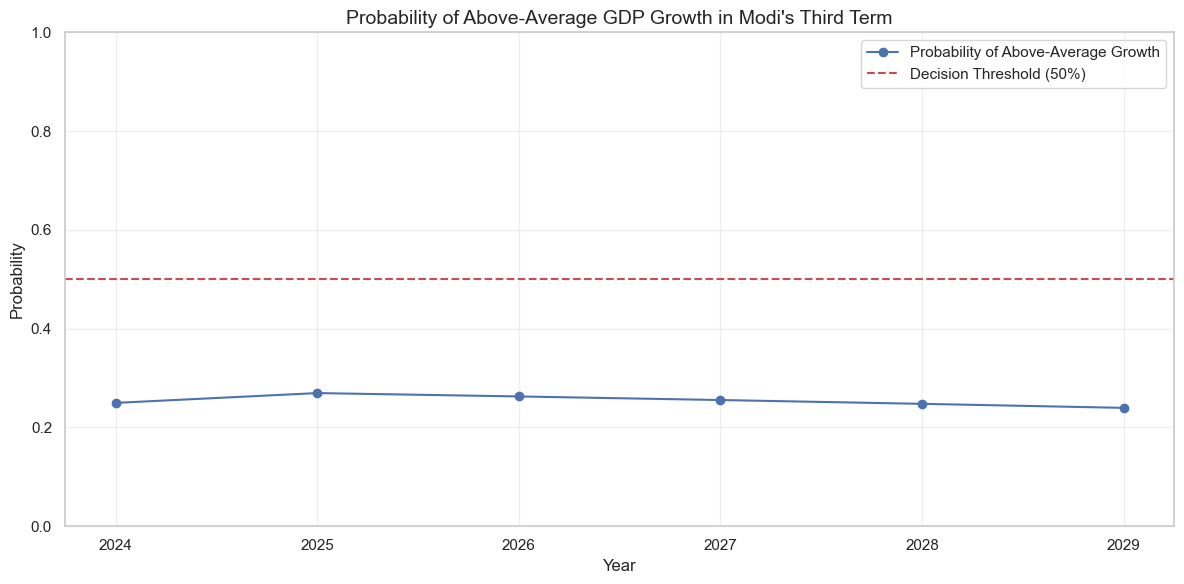

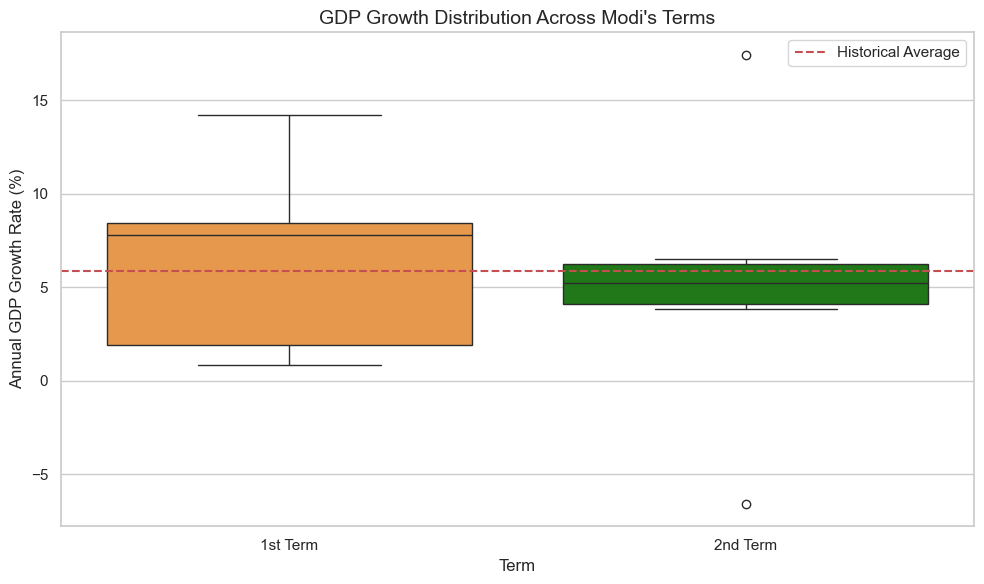


Growth Stability During Modi's Terms:
              mean       std       min        max        cv
term                                                       
1st Term  6.643735  5.425897  0.828154  14.207583  0.816694
2nd Term  5.278871  7.645488 -6.582945  17.439114  1.448319


In [ ]:
# Enhanced Logistic Growth Prediction for Modi's Third Term
# Using both economic indicators and political factors
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



# Prepare historical data for classification
yearly_growth = []
for i in range(1, len(india_gdp)):
    prev_year = india_gdp.iloc[i-1]
    curr_year = india_gdp.iloc[i]

    yoy_growth = ((curr_year['gdp_per_capita'] / prev_year['gdp_per_capita']) - 1) * 100
    yearly_growth.append({
        'year': curr_year['year'],
        'growth_rate': yoy_growth,
        'gdp': curr_year['gdp_per_capita'],
        'gdp_lag1': prev_year['gdp_per_capita']
    })

yearly_growth_df = pd.DataFrame(yearly_growth)

# Create target variable (1 if above historical average, 0 if below)
historical_avg = yearly_growth_df['growth_rate'].mean()
yearly_growth_df['above_avg'] = (yearly_growth_df['growth_rate'] > historical_avg).astype(int)

# Enhanced feature engineering
# 1. Political features
yearly_growth_df['pm_party'] = None
for _, row in filtered_pm_df.iterrows():
    mask = (yearly_growth_df['year'] >= row['Start'].year) & (yearly_growth_df['year'] <= row['End'].year)
    yearly_growth_df.loc[mask, 'pm_party'] = row['Party']

# Create political features
yearly_growth_df['is_bjp'] = (yearly_growth_df['pm_party'] == 'BJP').astype(int)
yearly_growth_df['is_inc'] = (yearly_growth_df['pm_party'] == 'INC').astype(int)
yearly_growth_df['years_in_power'] = yearly_growth_df.groupby('pm_party').cumcount() + 1

# 2. Economic features
yearly_growth_df['gdp_growth_lag1'] = yearly_growth_df['growth_rate'].shift(1)
yearly_growth_df['gdp_growth_lag2'] = yearly_growth_df['growth_rate'].shift(2)
yearly_growth_df['gdp_3yr_avg'] = yearly_growth_df['growth_rate'].rolling(3).mean()

# 3. Global economic context (simplified)
# Create dummy variable for global crises (1991, 2008, 2020)
yearly_growth_df['global_crisis'] = yearly_growth_df['year'].isin([1991, 2008, 2020]).astype(int)

# Prepare features and target
# Prepare features and target - corrected version
features = ['gdp_lag1', 'gdp_growth_lag1', 'gdp_growth_lag2', 'gdp_3yr_avg',
            'is_bjp', 'is_inc', 'years_in_power', 'global_crisis']

# Make sure to include the year column from yearly_growth_df in X
X = yearly_growth_df[features + ['year']].dropna()
y = yearly_growth_df.loc[X.index, 'above_avg']

# Split into train (pre-2014) and test (Modi era) sets
train_mask = X['year'] < 2014
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

# Scale features (excluding the year column)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['year']))
X_test_scaled = scaler.transform(X_test.drop(columns=['year']))

# Train logistic regression with class weights (balanced)
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)

# Evaluate on test set (Modi era)
y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy on Modi Era (2014-2024): {accuracy:.2%}")

# Feature importance analysis
# Corrected Feature importance analysis
importance = pd.DataFrame({
    'feature': features,  # Now using all features (including year was already excluded during scaling)
    'coefficient': log_model.coef_[0]
}).sort_values('coefficient', ascending=False)

print("\nFeature Importance for Above-Average Growth Prediction:")
print(importance)

# Prepare future data for prediction (2024-2029)
# Prepare future data for prediction (2024-2029)
last_data = yearly_growth_df.iloc[-1][features].copy()
future_predictions = []

for year in range(2024, 2030):
    # Update features for each year
    current_features = last_data.copy()

    # Political features (assuming BJP continues)
    current_features['is_bjp'] = 1
    current_features['is_inc'] = 0
    current_features['years_in_power'] = year - 2014 + 1  # Modi came to power in 2014

    # Economic features - handle cases where projection data might be missing
    try:
        if year == 2024:
            # For 2024, use actual 2023 data if available
            current_features['gdp_lag1'] = india_gdp[india_gdp['year'] == 2023]['gdp_per_capita'].values[0]
            current_growth = ((predictions_df[predictions_df['year'] == 2024]['predicted_gdp'].values[0]) /
                             current_features['gdp_lag1']) - 1
        else:
            current_features['gdp_lag1'] = predictions_df[predictions_df['year'] == year-1]['predicted_gdp'].values[0]
            current_growth = ((predictions_df[predictions_df['year'] == year]['predicted_gdp'].values[0] /
                             current_features['gdp_lag1']) - 1) * 100
    except (IndexError, KeyError):
        # If projections are missing, use the average growth rate
        avg_growth = yearly_growth_df['growth_rate'].mean()
        current_features['gdp_lag1'] = current_features['gdp_lag1'] * (1 + avg_growth/100)
        current_growth = avg_growth

    current_features['gdp_growth_lag1'] = current_growth
    current_features['gdp_growth_lag2'] = last_data['gdp_growth_lag1']
    current_features['gdp_3yr_avg'] = (current_growth + last_data['gdp_growth_lag1'] + last_data['gdp_growth_lag2']) / 3

    # Global crisis (none predicted)
    current_features['global_crisis'] = 0

    # Scale features
    current_scaled = scaler.transform(current_features.values.reshape(1, -1))

    # Predict probability
    prob_above_avg = log_model.predict_proba(current_scaled)[0][1]

    future_predictions.append({
        'year': year,
        'prob_above_avg': prob_above_avg,
        'predicted_class': log_model.predict(current_scaled)[0],
        'projected_growth': current_growth
    })

    # Update last_data for next iteration
    last_data = current_features.copy()
    last_data['gdp_growth_lag2'] = last_data['gdp_growth_lag1']
    last_data['gdp_growth_lag1'] = current_growth

future_pred_df = pd.DataFrame(future_predictions)
future_pred_df['growth_category'] = future_pred_df['predicted_class'].map({0: 'Below Average', 1: 'Above Average'})

print("\nFuture Growth Probability Predictions (2024-2029):")
print(future_pred_df[['year', 'prob_above_avg', 'growth_category', 'projected_growth']])

# Visualize the probability trend
plt.figure(figsize=(12, 6))
plt.plot(future_pred_df['year'], future_pred_df['prob_above_avg'], 'bo-', label='Probability of Above-Average Growth')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Threshold (50%)')
plt.title("Probability of Above-Average GDP Growth in Modi's Third Term", fontsize=14)
plt.ylabel("Probability", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("growth_probability_forecast.png", dpi=300, bbox_inches='tight')
plt.show()

# Modi Era Growth Stability Analysis
modi_years = yearly_growth_df[yearly_growth_df['year'] >= 2014].copy()
modi_years['term'] = modi_years['year'].apply(lambda x: '1st Term' if x < 2019 else '2nd Term')

plt.figure(figsize=(10, 6))
sns.boxplot(data=modi_years, x='term', y='growth_rate', palette=['#FF9933', '#138808'])
plt.title("GDP Growth Distribution Across Modi's Terms", fontsize=14)
plt.xlabel("Term", fontsize=12)
plt.ylabel("Annual GDP Growth Rate (%)", fontsize=12) 
plt.axhline(y=historical_avg, color='r', linestyle='--', label='Historical Average')
plt.legend()
plt.tight_layout()
plt.savefig("modi_terms_growth_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate stability metrics
modi_stability = modi_years.groupby('term')['growth_rate'].agg(['mean', 'std', 'min', 'max'])
modi_stability['cv'] = modi_stability['std'] / modi_stability['mean']  # Coefficient of variation
print("\nGrowth Stability During Modi's Terms:")
print(modi_stability)